Program Name: Jet_Length_Width_Determiner_v2.py

Date: 6/12/2022

Creator: Sol Samuels

Description: 
 - This program intakes jet related FITS files from ones device, specifically those named in the format \*\*/Group\*0.00_1.00_0.00\*.fits\* , and returns the jet's estimated length and width.
 - The program also displays normalized cumulative histogram figures for jet intensits by row or column of fits image as pixel count increases from the edge of the jet.
 - Unlike v1 this version displays results in kpc and fixes significant errors in v1
 - NOTE: This is version 2 of this program. Program is subject to be changed.
 
Variable Keywords:
 - cul = "cumulative"
 - slice = refers to rows or columns of fits image pixels
 - vals = "values"
 - norm = "normalized"

In [1]:
import astropy.io
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

from astropy.io import fits

In [2]:
#This Function Takes FITS data and pixel size to display Jet Length Info
def jet_length(data, pixel_size):
    
    #Creates list of slice sums
    slice_vals = []
    for row in data:
        slice_sum = 0
        for element in row:
            slice_sum += element
        slice_vals.append(slice_sum)
        
    #Creates list of Cumulative Sum values
    cul_vals = []
    movingsum = 0
    for element in slice_vals:
        movingsum += element
        cul_vals.append(movingsum)
        
    #Normalizes the Cumulative Values and creates list
    max_val = cul_vals[-1]
    norm_cul_vals = []
    norm = 0
    for element in cul_vals:
        norm = element / max_val
        norm_cul_vals.append(norm)
        
    #Edits the Normalizes Values to Exclude zeros and repeating terms
    final_reached = False
    norm_cul_vals_edit = []
    for element in norm_cul_vals:
        if element != 0 and final_reached is False:
            norm_cul_vals_edit.append(element)
        if element == 1:
            final_reached = True
        
    #Creates Value Headers for x-axis of histogram
    x_vals = []
    for x in range(len(norm_cul_vals_edit)):
        x_vals.append(x)
        
    #edited normalized cumulative histogram of data
    plt.bar(x_vals, norm_cul_vals_edit)
    plt.title("Normalized Cumulative Histogram of Jet Intensities From Bottom to Top")
    plt.xlabel("Number of pixels from bottom edge of jet")
    plt.ylabel("Normalized Cumulative Value")
    plt.show()
    
    #Determines and prints length of jet in pixels. Estimates to 0.98
    pixel_count = 0
    for element in norm_cul_vals_edit:
        if element >= 0.02 and element <= 0.98:
            pixel_count += 1
    print("\nLength of Jet in Pixels: {} pixels".format(pixel_count))

    #Converts pixel size to cm and prints
    jet_size_cm = pixel_size * pixel_count
    print("Jet Length in cm (y-direction): {} cm".format(jet_size_cm))
    
    #Converts cm size to kpc and prints
    jet_size_kpc = round((jet_size_cm * 3.24077928967e-19) / 1e3, 4)
    print("Jet Length in kpc (y-direction): {} kpc".format(jet_size_kpc))
    


In [3]:
#This Function Takes FITS data, FITS image width and pixel size to display Jet Width Info
def jet_width(data, width, pixel_size):
    
    #Reorients data so rows become columns
    data_reorient = []
    for x in range(width):
        col_sub = []
        for row in data:
            col_sub.append(row[x])
        data_reorient.append(col_sub)
        
    #Creates list of slice sums
    slice_vals = []
    for row in data_reorient:
        slice_sum = 0
        for element in row:
            slice_sum += element
        slice_vals.append(slice_sum)
        
    #Creates list of Cumulative Sum values
    cul_vals = []
    movingsum = 0
    for element in slice_vals:
        movingsum += element
        cul_vals.append(movingsum)
        
    #Normalizes the Cumulative Values and creates list
    max_val = cul_vals[-1]
    norm_cul_vals = []
    norm = 0
    for element in cul_vals:
        norm = element / max_val
        norm_cul_vals.append(norm)
        
    #Edits the Normalizes Values to Exclude zeros and repeating terms
    final_reached = False
    norm_cul_vals_edit = []
    for element in norm_cul_vals:
        if element != 0 and final_reached is False:
            norm_cul_vals_edit.append(element)
        if element == 1:
            final_reached = True

    #Creates Value Headers for x-axis of histogram
    x_vals = []
    for x in range(len(norm_cul_vals_edit)):
        x_vals.append(x)
        
    #Creates normalized cumulative histogram of data
    plt.bar(x_vals, norm_cul_vals_edit, color='red')
    plt.title("Normalized Cumulative Histogram of Jet Intensities From Left to Right")
    plt.xlabel("Number of pixels from left edge of jet")
    plt.ylabel("Normalized Cumulative Value")
    plt.show()
    
    #Determines and prints length of jet in pixels. Estimates to 0.98
    pixel_count = 0
    for element in norm_cul_vals_edit:
        if element >= 0.02 and element <= 0.98:
            pixel_count += 1
    print("\nWidth of Jet in Pixels: {} pixels".format(pixel_count))

    #Converts pixel size to cm and prints
    jet_size_cm = pixel_size * pixel_count
    print("Jet Width in cm (x-direction): {} cm".format(jet_size_cm))
    
    #Converts cm size to kpc and prints
    jet_size_kpc = round((jet_size_cm * 3.24077928967e-19) / 1e3, 4)
    print("Jet Width in kpc (x-direction): {} kpc".format(jet_size_kpc))
    


JET LENGTH AND WIDTH DETERMINING PROGRAM:
____________________________________________________________________________________________________

File Number 1/11

File Name: nu=30.0MHz/Group_L446_rc30_beta07_0010_nu=30.0_los=0.00_1.00_0.00_1.0Myr.fits.gz
Simulation Title: Simulation Group_L446_rc30_beta07 - 1.0 Myr - 30 MHz
Time index: 1.0003e+00 Myr
Pixel size: 1.2500e+21 cm
FITS Image Dimensions: 48x48 pixels 


JET LENGTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



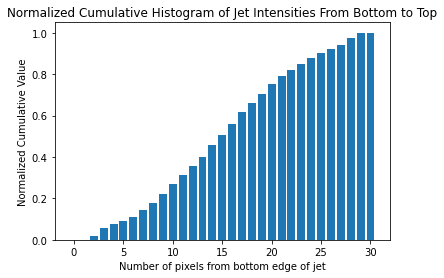


Length of Jet in Pixels: 27 pixels
Jet Length in cm (y-direction): 3.375e+22 cm
Jet Length in kpc (y-direction): 10.9376 kpc

JET WIDTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



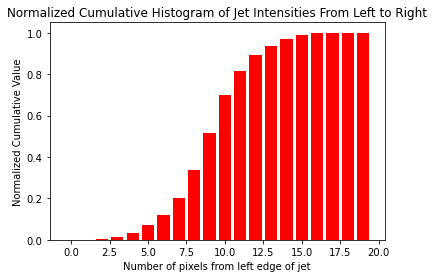


Width of Jet in Pixels: 11 pixels
Jet Width in cm (x-direction): 1.375e+22 cm
Jet Width in kpc (x-direction): 4.4561 kpc
____________________________________________________________________________________________________

File Number 2/11

File Name: nu=30.0MHz/Group_L446_rc30_beta07_0020_nu=30.0_los=0.00_1.00_0.00_2.0Myr.fits.gz
Simulation Title: Simulation Group_L446_rc30_beta07 - 2.0 Myr - 30 MHz
Time index: 2.0003e+00 Myr
Pixel size: 1.2500e+21 cm
FITS Image Dimensions: 80x80 pixels 


JET LENGTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



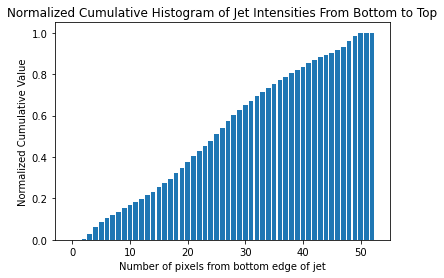


Length of Jet in Pixels: 46 pixels
Jet Length in cm (y-direction): 5.75e+22 cm
Jet Length in kpc (y-direction): 18.6345 kpc

JET WIDTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



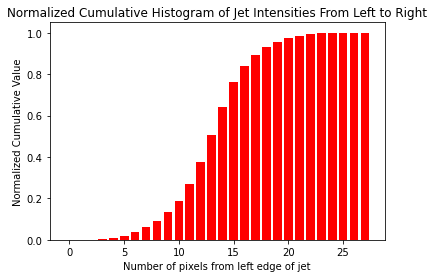


Width of Jet in Pixels: 15 pixels
Jet Width in cm (x-direction): 1.875e+22 cm
Jet Width in kpc (x-direction): 6.0765 kpc
____________________________________________________________________________________________________

File Number 3/11

File Name: nu=30.0MHz/Group_L446_rc30_beta07_0040_nu=30.0_los=0.00_1.00_0.00_4.0Myr.fits.gz
Simulation Title: Simulation Group_L446_rc30_beta07 - 4.0 Myr - 30 MHz
Time index: 4.0003e+00 Myr
Pixel size: 1.2500e+21 cm
FITS Image Dimensions: 144x144 pixels 


JET LENGTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



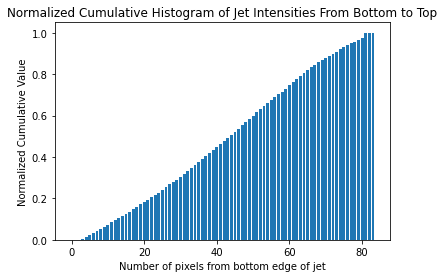


Length of Jet in Pixels: 76 pixels
Jet Length in cm (y-direction): 9.5e+22 cm
Jet Length in kpc (y-direction): 30.7874 kpc

JET WIDTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



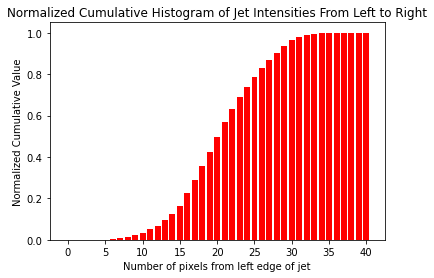


Width of Jet in Pixels: 22 pixels
Jet Width in cm (x-direction): 2.75e+22 cm
Jet Width in kpc (x-direction): 8.9121 kpc
____________________________________________________________________________________________________

File Number 4/11

File Name: nu=30.0MHz/Group_L446_rc30_beta07_0080_nu=30.0_los=0.00_1.00_0.00_8.0Myr.fits.gz
Simulation Title: Simulation Group_L446_rc30_beta07 - 8.0 Myr - 30 MHz
Time index: 8.0001e+00 Myr
Pixel size: 1.2500e+21 cm
FITS Image Dimensions: 272x272 pixels 


JET LENGTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



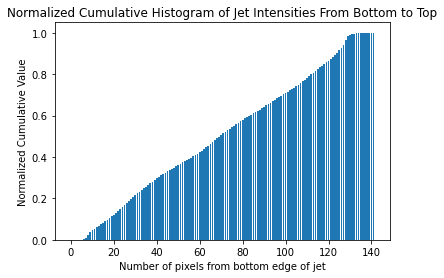


Length of Jet in Pixels: 121 pixels
Jet Length in cm (y-direction): 1.5125e+23 cm
Jet Length in kpc (y-direction): 49.0168 kpc

JET WIDTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



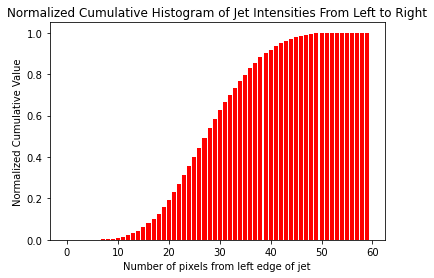


Width of Jet in Pixels: 34 pixels
Jet Width in cm (x-direction): 4.25e+22 cm
Jet Width in kpc (x-direction): 13.7733 kpc
____________________________________________________________________________________________________

File Number 5/11

File Name: nu=30.0MHz/Group_L446_rc30_beta07_0160_nu=30.0_los=0.00_1.00_0.00_16.0Myr.fits.gz
Simulation Title: Simulation Group_L446_rc30_beta07 - 16.0 Myr - 30 MHz
Time index: 1.6000e+01 Myr
Pixel size: 1.2500e+21 cm
FITS Image Dimensions: 464x464 pixels 


JET LENGTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



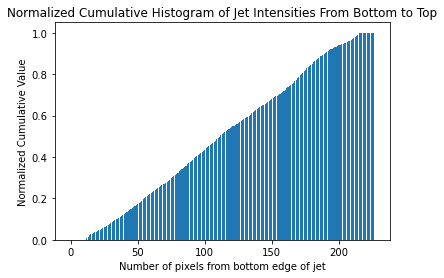


Length of Jet in Pixels: 199 pixels
Jet Length in cm (y-direction): 2.4875e+23 cm
Jet Length in kpc (y-direction): 80.6144 kpc

JET WIDTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



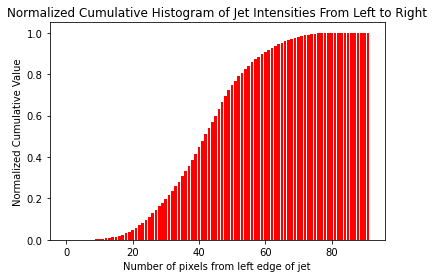


Width of Jet in Pixels: 54 pixels
Jet Width in cm (x-direction): 6.75e+22 cm
Jet Width in kpc (x-direction): 21.8753 kpc
____________________________________________________________________________________________________

File Number 6/11

File Name: nu=30.0MHz/Group_L446_rc30_beta07_0320_nu=30.0_los=0.00_1.00_0.00_32.0Myr.fits.gz
Simulation Title: Simulation Group_L446_rc30_beta07 - 32.0 Myr - 30 MHz
Time index: 3.2000e+01 Myr
Pixel size: 1.2500e+21 cm
FITS Image Dimensions: 720x720 pixels 


JET LENGTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



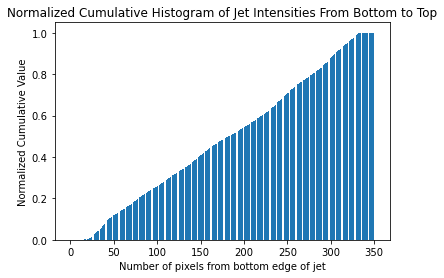


Length of Jet in Pixels: 302 pixels
Jet Length in cm (y-direction): 3.775e+23 cm
Jet Length in kpc (y-direction): 122.3394 kpc

JET WIDTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



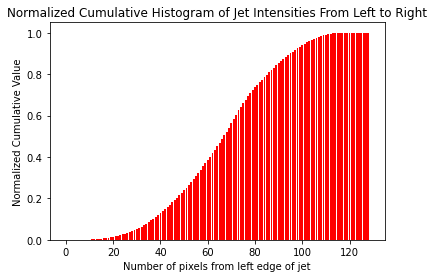


Width of Jet in Pixels: 85 pixels
Jet Width in cm (x-direction): 1.0625e+23 cm
Jet Width in kpc (x-direction): 34.4333 kpc
____________________________________________________________________________________________________

File Number 7/11

File Name: nu=30.0MHz/Group_L446_rc30_beta07_0640_nu=30.0_los=0.00_1.00_0.00_64.0Myr.fits.gz
Simulation Title: Simulation Group_L446_rc30_beta07 - 64.0 Myr - 30 MHz
Time index: 6.4000e+01 Myr
Pixel size: 1.2500e+21 cm
FITS Image Dimensions: 1168x1168 pixels 


JET LENGTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



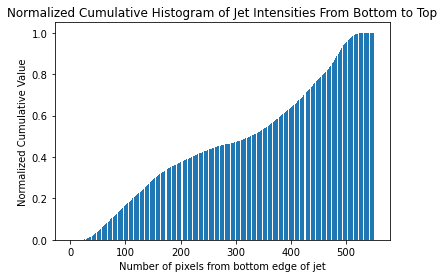


Length of Jet in Pixels: 469 pixels
Jet Length in cm (y-direction): 5.8625e+23 cm
Jet Length in kpc (y-direction): 189.9907 kpc

JET WIDTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



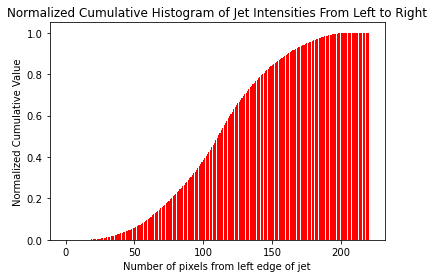


Width of Jet in Pixels: 152 pixels
Jet Width in cm (x-direction): 1.9e+23 cm
Jet Width in kpc (x-direction): 61.5748 kpc
____________________________________________________________________________________________________

File Number 8/11

File Name: nu=30.0MHz/Group_L446_rc30_beta07_1212_nu=30.0_los=0.00_1.00_0.00_121.2Myr.fits.gz
Simulation Title: Simulation Group_L446_rc30_beta07 - 121.2 Myr - 30 MHz
Time index: 1.2120e+02 Myr
Pixel size: 1.2500e+21 cm
FITS Image Dimensions: 2032x2032 pixels 


JET LENGTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



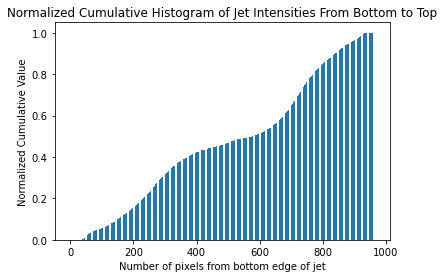


Length of Jet in Pixels: 864 pixels
Jet Length in cm (y-direction): 1.08e+24 cm
Jet Length in kpc (y-direction): 350.0042 kpc

JET WIDTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



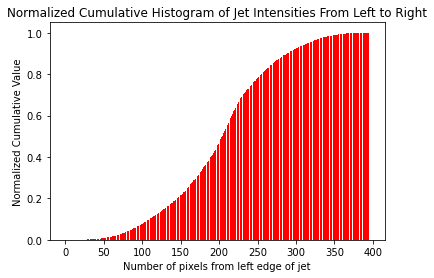


Width of Jet in Pixels: 274 pixels
Jet Width in cm (x-direction): 3.425e+23 cm
Jet Width in kpc (x-direction): 110.9967 kpc
____________________________________________________________________________________________________

File Number 9/11

File Name: nu=30.0MHz/Group_L446_rc30_beta07_2570_nu=30.0_los=0.00_1.00_0.00_256.1Myr.fits.gz
Simulation Title: Simulation Group_L446_rc30_beta07 - 256.1 Myr - 30 MHz
Time index: 2.5611e+02 Myr
Pixel size: 1.2500e+21 cm
FITS Image Dimensions: 4464x4464 pixels 


JET LENGTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



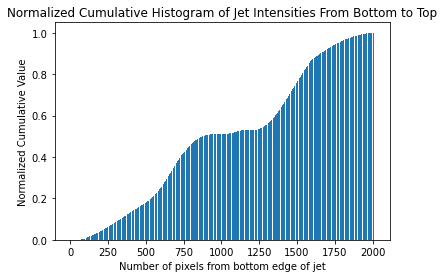


Length of Jet in Pixels: 1725 pixels
Jet Length in cm (y-direction): 2.15625e+24 cm
Jet Length in kpc (y-direction): 698.793 kpc

JET WIDTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



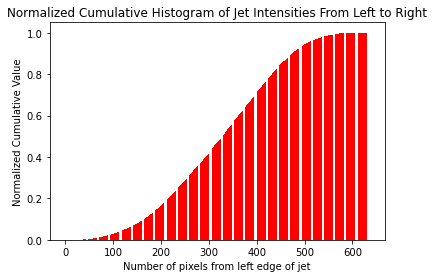


Width of Jet in Pixels: 451 pixels
Jet Width in cm (x-direction): 5.6375e+23 cm
Jet Width in kpc (x-direction): 182.6989 kpc
____________________________________________________________________________________________________

File Number 10/11

File Name: nu=30.0MHz/Group_L446_rc30_beta07_5140_nu=30.0_los=0.00_1.00_0.00_513.1Myr.fits.gz
Simulation Title: Simulation Group_L446_rc30_beta07 - 513.1 Myr - 30 MHz
Time index: 5.1314e+02 Myr
Pixel size: 1.2500e+21 cm
FITS Image Dimensions: 6160x6160 pixels 


JET LENGTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



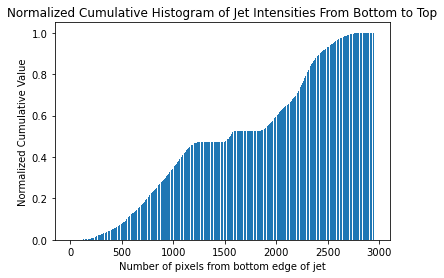


Length of Jet in Pixels: 2380 pixels
Jet Length in cm (y-direction): 2.975e+24 cm
Jet Length in kpc (y-direction): 964.1318 kpc

JET WIDTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



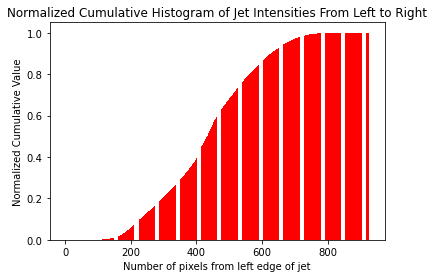


Width of Jet in Pixels: 550 pixels
Jet Width in cm (x-direction): 6.875e+23 cm
Jet Width in kpc (x-direction): 222.8036 kpc
____________________________________________________________________________________________________

File Number 11/11

File Name: nu=30.0MHz/Group_L446_rc30_beta07_7740_nu=30.0_los=0.00_1.00_0.00_773.1Myr.fits.gz
Simulation Title: Simulation Group_L446_rc30_beta07 - 773.1 Myr - 30 MHz
Time index: 7.7312e+02 Myr
Pixel size: 1.2500e+21 cm
FITS Image Dimensions: 7600x7600 pixels 


JET LENGTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



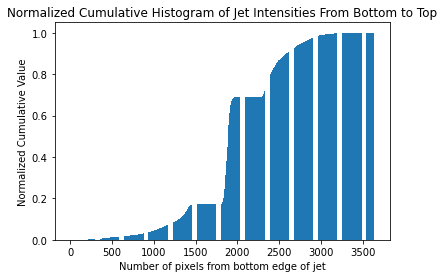


Length of Jet in Pixels: 2236 pixels
Jet Length in cm (y-direction): 2.795e+24 cm
Jet Length in kpc (y-direction): 905.7978 kpc

JET WIDTH DATA:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



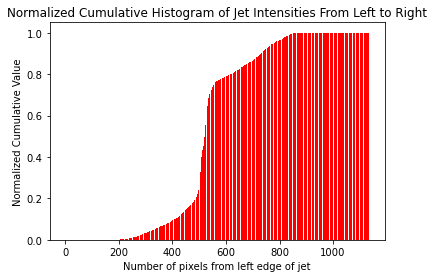


Width of Jet in Pixels: 547 pixels
Jet Width in cm (x-direction): 6.8375e+23 cm
Jet Width in kpc (x-direction): 221.5883 kpc
____________________________________________________________________________________________________



In [4]:
#Main Calling Block of Code

print("\nJET LENGTH AND WIDTH DETERMINING PROGRAM:")
print("{}\n".format("_"*100))

path = '**/Group*nu=30.0*0.00_1.00_0.00*.fits*'

# Determines if there are any files in device
total_files = len(glob.glob(path, recursive=True))

if total_files > 0:
    file_count = 0
    for file in sorted(glob.glob(path, recursive=True)):

        file_count += 1

        try:
            print("File Number {}/{}\n".format(file_count, total_files))
            print("File Name: {}".format(file))
            fits_image_hdul = fits.open(file)

            #Displays FITS Image title, time index, and pixel size
            sim_title = fits_image_hdul[0].header['OBJECT']
            sim_time = fits_image_hdul[0].header['TIME']
            pixel = fits_image_hdul[0].header['CDELT1']
            print("Simulation Title: {}".format(sim_title))
            print("Time index: {}".format(sim_time))
            print("Pixel size: {}".format(pixel))
            pixel_size = float(pixel[:-3])

            #Difines Data From FITS image and records image dimensions
            data =  fits_image_hdul[0].data
            length = len(data[0])
            width = len(data)
            print("FITS Image Dimensions: {}x{} pixels \n".format(length, width))

            #Calls jet_length function
            print("\nJET LENGTH DATA:")
            print("{}\n".format("~"*50))
            jet_length(data, pixel_size)

            #Calls jet_width function
            print("\nJET WIDTH DATA:")
            print("{}\n".format("~"*50))
            jet_width(data, width, pixel_size)

            print("{}\n".format("_"*100))

        except OSError:
            print("Error with file: {}".format(file))
            print("Empty or corrupt FITS file")
            
else:
    print("ERROR: Could not find any necessary files on your device")
    print("Program intakes files of the name: {}".format(path))